# Generating BTS roads network for florida

In [1]:
import geopandas as gpd
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import collections

from shapely.geometry import Polygon, LineString, Point

In [2]:
pd.set_option('display.max_columns', None)
usa_roads = gpd.read_file("data/National_Highway_Network-shp/National_Highway_Planning_Network.shp")

<AxesSubplot:>

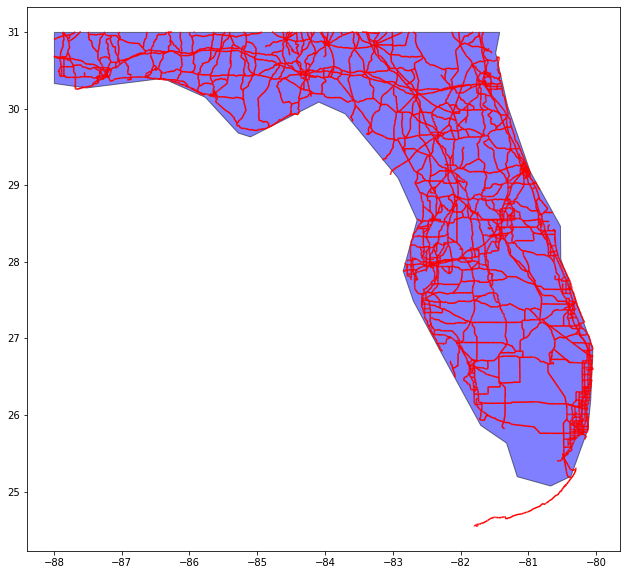

In [3]:
florida_polygon = Polygon([(-88, 24), (-88, 31), (-79, 31), (-79, 24)])

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
n_america = world[world["name"] == "United States of America"]

fig, ax = plt.subplots(figsize=(17,10))

florida_map = gpd.clip(n_america, florida_polygon)
florida_map.plot(ax=ax, edgecolor="black", color = "blue", alpha=0.5)

florida_roads2 = gpd.clip(usa_roads, florida_polygon)
florida_roads2.plot(ax=ax, color="red")

In [4]:
florida_roads = florida_roads2.copy()
florida_roads.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
florida_roads['maxspeed'] = '70 mph'
def add_edge_time(df):
    df['maxspeed'] = df['maxspeed'].str.extract('(\d+)').astype(int)
    df['duration'] = df['KM'] / (df['maxspeed'] * 1.609344)

florida_roads['key'] = 0
add_edge_time(florida_roads)
florida_roads.head(2)

,OBJECTID,YEAR_RECOR,ROUTE_ID,BEGIN_POIN,END_POINT,F_SYSTEM,FACILITY_T,URBAN_CODE,RECTYPE,VERSION,RECID,ORIGID,CTFIPS,SOURCE,LGURB,SMURB,SIGN1,SIGNT1,SIGNN1,SIGNQ1,SIGN2,SIGNT2,SIGNN2,SIGNQ2,SIGN3,SIGNT3,SIGNN3,SIGNQ3,LNAME,MILES,KM,FCLASS,RUCODE,STATUS,NHS,STRAHNET,FAC_ID,CONN_ID,CONN_DES,CONN_MILES,LRSKEY,LRSSEQ,BEGMP,ENDMP,STFIPS,ShapeSTLen,geometry,maxspeed,key,duration
59667,59668,2010,48110000,0.388,0.865,3,2,68482,L,2014.05,12016553,12016553,33,H,125,68482,U98,U,98,None,S30,S,30,None,S298,S,298,None,None,0.436,0.702,2,3,1,0,0,None,None,None,0.0,004811000000033,1,0.388,3.972,12,826.453132,"LINESTRING (-87.43072 30.40485, -87.42579 30.4...",70,0,0.006231
79828,79829,2010,38090000,4.507,22.737,3,2,99999,L,2014.05,12016554,12016554,123,H,0,0,U98,U,98,None,S30,S,30,None,None,None,None,None,None,17.730,28.533,2,1,1,0,0,None,None,None,0.0,003809000000123,1,0.000,23.706,12,33924.900394,"LINESTRING (-83.90058 30.14111, -83.90050 30.1...",70,0,0.253280


In [6]:
florida_roads[florida_roads.OBJECTID == 79833]

,OBJECTID,YEAR_RECOR,ROUTE_ID,BEGIN_POIN,END_POINT,F_SYSTEM,FACILITY_T,URBAN_CODE,RECTYPE,VERSION,RECID,ORIGID,CTFIPS,SOURCE,LGURB,SMURB,SIGN1,SIGNT1,SIGNN1,SIGNQ1,SIGN2,SIGNT2,SIGNN2,SIGNQ2,SIGN3,SIGNT3,SIGNN3,SIGNQ3,LNAME,MILES,KM,FCLASS,RUCODE,STATUS,NHS,STRAHNET,FAC_ID,CONN_ID,CONN_DES,CONN_MILES,LRSKEY,LRSSEQ,BEGMP,ENDMP,STFIPS,ShapeSTLen,geometry,maxspeed,key,duration
79832,79833,2010,54030000,5.047,8.117,3,2,99999,L,2014.05,12003409,1200004813,65,H,0,0,U19,U,19,None,S57,S,57,None,None,None,None,None,None,3.189,5.132,2,1,1,7,0,None,None,None,0.0,005403000000065,4,5.018,8.139,12,5772.377572,"LINESTRING (-83.88778 30.47928, -83.88537 30.4...",70,0,0.045555


In [7]:
florida_roads[florida_roads.OBJECTID == 125045]

,OBJECTID,YEAR_RECOR,ROUTE_ID,BEGIN_POIN,END_POINT,F_SYSTEM,FACILITY_T,URBAN_CODE,RECTYPE,VERSION,RECID,ORIGID,CTFIPS,SOURCE,LGURB,SMURB,SIGN1,SIGNT1,SIGNN1,SIGNQ1,SIGN2,SIGNT2,SIGNN2,SIGNQ2,SIGN3,SIGNT3,SIGNN3,SIGNQ3,LNAME,MILES,KM,FCLASS,RUCODE,STATUS,NHS,STRAHNET,FAC_ID,CONN_ID,CONN_DES,CONN_MILES,LRSKEY,LRSSEQ,BEGMP,ENDMP,STFIPS,ShapeSTLen,geometry,maxspeed,key,duration
125044,125045,2010,54030000,4.754,5.047,3,2,99999,L,2014.05,12003412,1200004815,65,H,0,0,U19,U,19,None,S57,S,57,None,None,None,None,None,None,0.299,0.481,2,1,1,7,0,None,None,None,0.0,005403000000065,3,4.74,5.018,12,544.144772,"LINESTRING (-83.88973 30.47542, -83.88962 30.4...",70,0,0.00427


In [8]:
def add_incident_nodes(df_in): 
    df = df_in.copy()
    for i in df.itertuples():
        idx = int(i.Index)
        df.loc[idx,'u'] = str(i.geometry.coords[:][0])
        df.loc[idx,'v'] = str(i.geometry.coords[:][-1])
    df.loc[:,'key'] = 0 
    
    df.drop('geometry',inplace = True, axis=1)
    
    return df

florida_roads_formatted = add_incident_nodes(florida_roads)

In [9]:
florida_roads_formatted.head()

,OBJECTID,YEAR_RECOR,ROUTE_ID,BEGIN_POIN,END_POINT,F_SYSTEM,FACILITY_T,URBAN_CODE,RECTYPE,VERSION,RECID,ORIGID,CTFIPS,SOURCE,LGURB,SMURB,SIGN1,SIGNT1,SIGNN1,SIGNQ1,SIGN2,SIGNT2,SIGNN2,SIGNQ2,SIGN3,SIGNT3,SIGNN3,SIGNQ3,LNAME,MILES,KM,FCLASS,RUCODE,STATUS,NHS,STRAHNET,FAC_ID,CONN_ID,CONN_DES,CONN_MILES,LRSKEY,LRSSEQ,BEGMP,ENDMP,STFIPS,ShapeSTLen,maxspeed,key,duration,u,v
59667,59668,2010,48110000,0.388,0.865,3,2,68482,L,2014.05,12016553,12016553,33,H,125,68482,U98,U,98,None,S30,S,30,None,S298,S,298,None,None,0.436,0.702,2,3,1,0,0,None,None,None,0.0,004811000000033,1,0.388,3.972,12,826.453132,70,0,0.006231,"(-87.4307209999212, 30.40484699984233)","(-87.42454499969789, 30.40130100031033)"
79828,79829,2010,38090000,4.507,22.737,3,2,99999,L,2014.05,12016554,12016554,123,H,0,0,U98,U,98,None,S30,S,30,None,None,None,None,None,None,17.730,28.533,2,1,1,0,0,None,None,None,0.0,003809000000123,1,0.000,23.706,12,33924.900394,70,0,0.253280,"(-83.90058299983126, 30.14111399975853)","(-83.61927300032583, 30.10048800026324)"
79829,79830,2010,54020000,10.017,16.373,3,2,99999,L,2014.05,12002476,1200004384,65,H,0,0,U19,U,19,None,U27,U,27,None,S20,S,20,None,None,6.145,9.889,2,1,1,7,0,None,None,None,0.0,005402000000065,4,10.029,16.421,12,11789.572673,70,0,0.087782,"(-83.91131699970391, 30.411041000233514)","(-83.81385800018202, 30.378138999693917)"
79830,79831,2010,54001000,9.295,9.635,1,2,99999,L,2014.05,12003413,1200004816,65,H,0,0,I10,I,10,None,S8,S,8,None,None,None,None,None,None,0.327,0.526,1,1,1,1,6,None,None,None,0.0,005400100000065,7,9.271,9.606,12,633.596299,70,0,0.004669,"(-83.88972500011002, 30.47541800017222)","(-83.88416599965477, 30.474364999724102)"
79831,79832,2010,54070000,10.135,14.614,4,2,99999,L,2014.05,12016555,12016555,65,H,0,0,C259,C,259,None,None,None,None,None,None,None,None,None,None,4.386,7.058,6,1,1,0,0,None,None,None,0.0,005450700000065,2,10.027,14.614,12,8171.548732,70,0,0.062652,"(-83.92083899978176, 30.47841900007999)","(-83.87334100044383, 30.522048999718262)"


In [10]:
florida_roads_formatted['length'] = florida_roads_formatted['KM']*1000

In [11]:
import re
def gen_nodes_gdfs(df):
    nodes_df = gpd.GeoDataFrame(index = pd.unique(df[['u', 'v']].values.ravel('K')),columns=['y','x','osmid','geometry'],crs="EPSG:4326")
    
    pattern = re.compile(r'(\d+.\d+)')
    
    for row in nodes_df.itertuples():
        x,y = re.findall(pattern,row.Index)
        nodes_df.loc[row.Index,'y'] = float(y)
        nodes_df.loc[row.Index,'x'] = -float(x)
        nodes_df.loc[row.Index,'geometry'] = Point(-float(x),float(y))
        nodes_df.loc[row.Index,'osmid'] = row.Index
        
    nodes_df.loc[:,'idx'] = range(len(nodes_df))
    nodes_df.set_index('idx', drop=True, inplace=True)
    
    return nodes_df

In [12]:
nodes_gdfs = gen_nodes_gdfs(florida_roads_formatted)
nodes_gdfs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15507 entries, 0 to 15506
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   y         15507 non-null  object  
 1   x         15507 non-null  object  
 2   osmid     15507 non-null  object  
 3   geometry  15507 non-null  geometry
dtypes: geometry(1), object(3)
memory usage: 605.7+ KB


In [13]:
nodes_map = pd.Series(data=nodes_gdfs.index, index=nodes_gdfs['osmid'])

In [15]:
G = ox.graph_from_gdfs(nodes_gdfs, florida_roads_formatted)

nx.relabel_nodes(G, dict(nodes_map), copy=False)
nx.set_node_attributes(G, nodes_gdfs.to_dict('index'), name=None)

In [16]:
G = ox.simplification.simplify_graph(G)

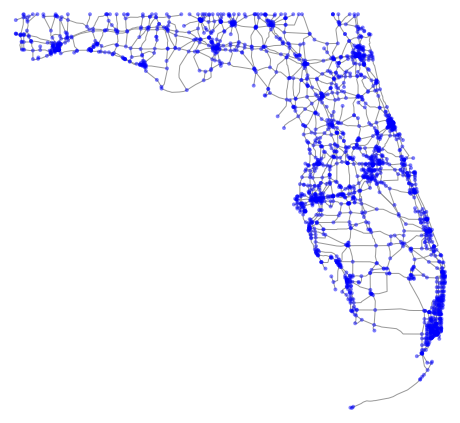

In [17]:
fig, ax = ox.plot_graph(G,node_color='blue',bgcolor='white',node_alpha=0.5)

Text(0.5, 1.0, 'connected components size')

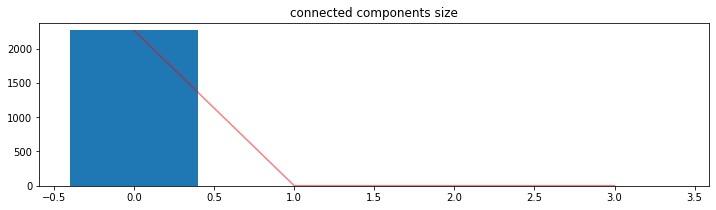

In [18]:
G_undirected = G.to_undirected()
component_size = sorted([len(component) for component in nx.connected_components(G_undirected)], reverse=True)
fig, ax = plt.subplots(figsize=(12,3))
plt.bar(range(len(component_size)),component_size)
plt.plot(range(len(component_size)),component_size,color='red',alpha=0.5)
plt.title('connected components size')

In [19]:
largest_cc_nodes = max(nx.connected_components(G_undirected), key=len)
largest_cc = G_undirected.subgraph(largest_cc_nodes).copy()

In [20]:
largest_cc.edges[2, 3,0]

{'OBJECTID': [124328, 124322],
 'YEAR_RECOR': 2010,
 'ROUTE_ID': '54030000',
 'BEGIN_POIN': [0.0, 4.509],
 'END_POINT': [4.509, 4.754],
 'F_SYSTEM': 3,
 'FACILITY_T': 2,
 'URBAN_CODE': 99999,
 'RECTYPE': 'L',
 'VERSION': '2014.05',
 'RECID': [12003410, 12003414],
 'ORIGID': [1200004817, 1200004814],
 'CTFIPS': 65,
 'SOURCE': 'H',
 'LGURB': 0,
 'SMURB': 0,
 'SIGN1': 'U19',
 'SIGNT1': 'U',
 'SIGNN1': '19',
 'SIGN2': 'S57',
 'SIGNT2': 'S',
 'SIGNN2': '57',
 'MILES': [0.251, 4.643],
 'KM': [0.404, 7.473],
 'FCLASS': 2,
 'RUCODE': 1,
 'STATUS': 1,
 'NHS': 7,
 'STRAHNET': 0,
 'CONN_MILES': 0.0,
 'LRSKEY': '005403000000065',
 'LRSSEQ': [1, 2],
 'BEGMP': [0.0, 4.487],
 'ENDMP': [4.487, 4.74],
 'STFIPS': '12',
 'ShapeSTLen': [8424.27453764536, 456.38101204167475],
 'maxspeed': 70,
 'duration': [0.06633581313699423, 0.0035861994523411845],
 'length': 7877.0,
 'geometry': <shapely.geometry.linestring.LineString at 0x1a26d7b908>}

It should be noted that by simplifying the graph, the edges attributes where added as list elements. 
For the duration attribute, theses element will have to be summed later on.

In [21]:
nx.write_gpickle(largest_cc,'data/BTS_florida_G.plk')